In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
x = [(1,2),(2,1),(2,3),(4,1),(1,3),(2,4),(4,3),(3,3),(3,2),(10,12),(12,11),(12,13),(14,11),
(11,13),(12,14),(14,13),(13,13),(13,12),(31,32),(32,31),(32,33),
(34,31),(31,33),(32,34),(34,33),(33,33),(33,32),(45,45)]

def dist(x,y):
    return (sum([(i - j) ** 2 for i, j in zip(x, y)]))**0.5


dist_mat = {}
for i in x:
    for j in x:
        dist_mat[i,j] = dist(i,j)



def medoid(l):
    k = []
    for i in l:
        h = 0
        for j in l:
            h = h + dist_mat[i,j]
        k.append(h)
    return l[k.index(min(k))]

In [3]:
def k_medoids(x,n_cluster,n_iter):
    plt.scatter(*zip(*x),c='black',label='data points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    centroids = random.sample(x, n_cluster)
    print('initial centroids are -', centroids, '\n')
    for i in range(n_iter):
        print('iteration -',i,'\n')
        distance = [[dist(i,j) for j in centroids] for i in x]
        nearest = [centroids[i.index(min(i))] for i in distance]
        cluster = {}
        for i in centroids:
            cluster[i] = []
        for i in x:
            cluster[nearest[x.index(i)]].append(i)
        print(cluster)
        labels=['cluster1','cluster2','cluster3']
        color=['red','green','blue']
        i = 0
        for k, v in cluster.items():
            plt.scatter(*zip(*v),c=color[i],label=labels[i])
            plt.scatter(k[0],k[1],marker = 'D',c='black')
            i = i+1
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        new_centroids = [medoid(cluster[i]) for i in centroids]
        if centroids == new_centroids:
            break
        centroids = new_centroids
    return cluster

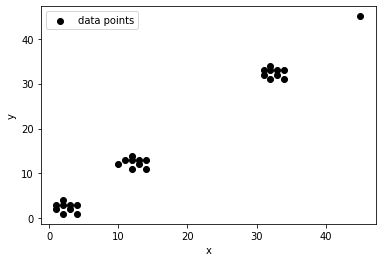

initial centroids are - [(1, 3), (13, 13), (11, 13)] 

iteration - 0 

{(1, 3): [(1, 2), (2, 1), (2, 3), (4, 1), (1, 3), (2, 4), (4, 3), (3, 3), (3, 2)], (13, 13): [(12, 11), (12, 13), (14, 11), (12, 14), (14, 13), (13, 13), (13, 12), (31, 32), (32, 31), (32, 33), (34, 31), (31, 33), (32, 34), (34, 33), (33, 33), (33, 32), (45, 45)], (11, 13): [(10, 12), (11, 13)]}


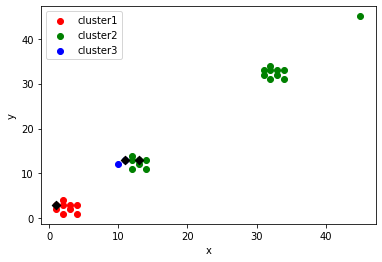

iteration - 1 

{(2, 3): [(1, 2), (2, 1), (2, 3), (4, 1), (1, 3), (2, 4), (4, 3), (3, 3), (3, 2)], (31, 32): [(31, 32), (32, 31), (32, 33), (34, 31), (31, 33), (32, 34), (34, 33), (33, 33), (33, 32), (45, 45)], (10, 12): [(10, 12), (12, 11), (12, 13), (14, 11), (11, 13), (12, 14), (14, 13), (13, 13), (13, 12)]}


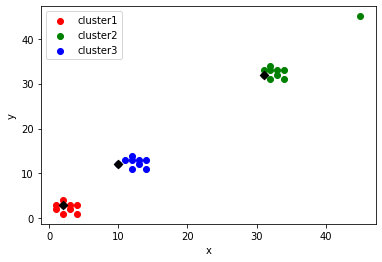

iteration - 2 

{(2, 3): [(1, 2), (2, 1), (2, 3), (4, 1), (1, 3), (2, 4), (4, 3), (3, 3), (3, 2)], (33, 33): [(31, 32), (32, 31), (32, 33), (34, 31), (31, 33), (32, 34), (34, 33), (33, 33), (33, 32), (45, 45)], (12, 13): [(10, 12), (12, 11), (12, 13), (14, 11), (11, 13), (12, 14), (14, 13), (13, 13), (13, 12)]}


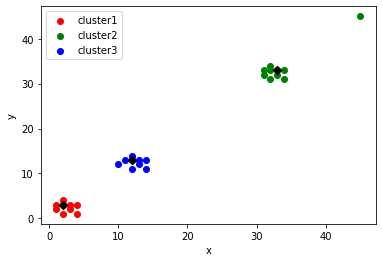

In [4]:
clusters = k_medoids(x,3,100)

In [5]:
print ('The final clusters are -')
for k, v in clusters.items():
    print(v)

The final clusters are -
[(1, 2), (2, 1), (2, 3), (4, 1), (1, 3), (2, 4), (4, 3), (3, 3), (3, 2)]
[(31, 32), (32, 31), (32, 33), (34, 31), (31, 33), (32, 34), (34, 33), (33, 33), (33, 32), (45, 45)]
[(10, 12), (12, 11), (12, 13), (14, 11), (11, 13), (12, 14), (14, 13), (13, 13), (13, 12)]
